In [3]:
import numpy as np
import torch

import pandas as pd

import torchvision
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt

In [4]:
data_frame = pd.read_csv('../ANN_part2/mnist_train.csv', delimiter=',')
data = data_frame.to_numpy()

labels = data[:8, 0]
data = data[:8, 1:]

data_norm = data / np.max(data)

data_norm = data_norm.reshape(data_norm.shape[0], 1, 28, 28)

print(data_norm.shape)
print(labels.shape)

dataT = torch.tensor(data_norm).float()
labelsT = torch.tensor(labels).long()

(8, 1, 28, 28)
(8,)


In [5]:
class CustomDataset(Dataset):
    def __init__(self, tensors, transform=None):
        assert all(tensors[0].size(0)==t.size(0) for t in tensors), "Size mismatch between tensors"
        
        self.tensors = tensors
        self.transform = transform
        
    def __getitem__(self, index):
        
        if self.transform:
            x = self.transform(self.tensors[0][index])
        else:
            x = self.tensors[0][index]
        y = self.tensors[1][index]
        
        return x, y
    
    def __len__(self):
        return self.tensors[0].size(0)
    

In [6]:
img_trains = T.Compose([
    T.ToPILImage(),
    T.RandomVerticalFlip(p=.5),
    T.ToTensor()
])

In [8]:
train_data = CustomDataset((dataT, labelsT), img_trains)

dataloader = DataLoader(train_data, batch_size=8, shuffle=False)

In [9]:
type(train_data)

__main__.CustomDataset

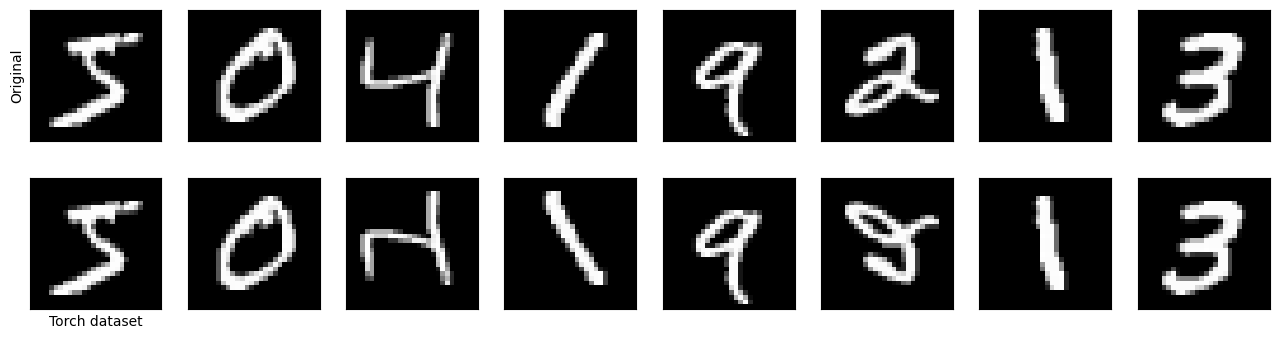

In [12]:
X, y = next(iter(dataloader))

fig, axs = plt.subplots(2, 8, figsize=(16,4))

for i in range(8):
    axs[0, i].imshow(dataT[i, 0, :, :].detach(), cmap='gray')
    axs[1, i].imshow(X[i, 0, :, :].detach(), cmap='gray')
    
    for row in range(2):
        axs[row, i].set_xticks([])
        axs[row, i].set_yticks([])
        
axs[0,0].set_ylabel('Original')
axs[1, 0].set_xlabel('Torch dataset')

plt.show()

In [13]:
len(train_data)

8